# <font color=blue>Assignments for "Main Statistical Concepts"</font>

Please upload your solutions to the following assignments as Jupyter Notebook to your GitHub account and share the GitHub link with the button below. You can talk to your mentor about the issues you have in mind or ask Slack at office time.

1. By using distribution=np.random.name_distribution([],[]), write the name of distribution of your choice in place of `name_distribution`and fill out the bracket with your choice again. Then please, 

a) Draw the histogram and interpret

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random

In [2]:
sample_mean=57
sample_std=3.5
sample_size=200
random.seed(12)
data=np.random.normal(sample_mean,sample_std,sample_size)
data

array([58.43299938, 61.06414779, 62.47713531, 58.0211863 , 52.62126054,
       56.64834609, 53.10912841, 58.39968995, 57.2947252 , 54.61092087,
       58.55411863, 51.46204522, 58.4383504 , 55.11799018, 57.44563423,
       51.8394417 , 53.46113507, 57.47583723, 62.64133631, 56.65227674,
       55.56072899, 54.07925749, 60.37011695, 53.3299156 , 53.77020162,
       58.21634729, 54.59463816, 58.33910112, 61.2874979 , 60.83662464,
       53.93033571, 55.07858181, 56.25113212, 55.51238288, 58.29596955,
       55.84471085, 59.34158353, 52.69488345, 50.69046574, 57.43472938,
       49.10765684, 59.99757553, 54.28319202, 57.20548472, 54.67616454,
       59.78216461, 60.20251073, 55.26879862, 56.06602275, 58.39896849,
       54.58749453, 52.58047508, 53.95600801, 57.43155633, 56.94531738,
       53.20128587, 58.37291395, 56.65251386, 55.32688999, 57.81929145,
       55.05766697, 51.09289233, 58.18459066, 54.11276044, 55.45756403,
       58.70234181, 55.27720046, 61.4275656 , 61.28788655, 53.84

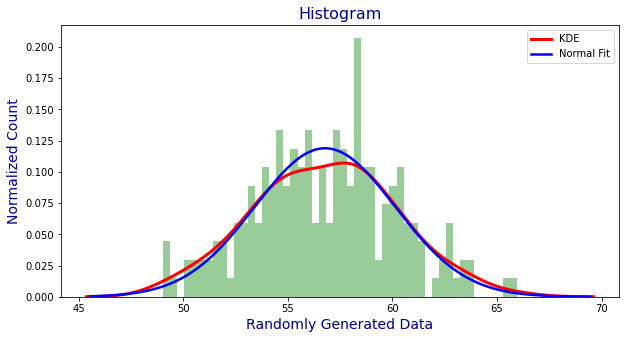

In [3]:
from scipy.stats import norm
plt.figure(figsize=(10, 5))
sns.distplot(data, kde=True,kde_kws={"lw":3, "color":"red","label":"KDE"}, bins=50, fit=norm,  fit_kws=dict(linewidth=2.5,color="blue",label="Normal Fit"),color = 'green',hist_kws={"histtype": "stepfilled", "linewidth": 2,"alpha": 0.4})
plt.title("Histogram", color="darkblue",fontsize=16)
plt.xlabel("Randomly Generated Data", color="darkblue",fontsize=14)
plt.ylabel("Normalized Count", color="darkblue",fontsize=14)
plt.legend()
plt.show()

Interpretation: When the histogram is examined, the distribution looks symmetrical. However, it has a little positive skewness compared to the normal distribution (see normal fit curve in graph). We can conclude that the data is normally distributed. 

   b) Draw Q-Q plot and interpret

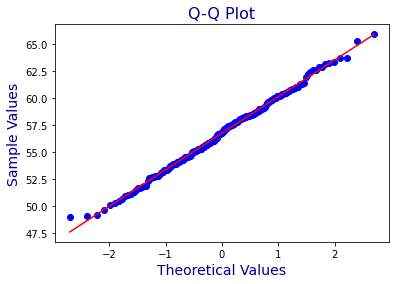

In [4]:
res=stats.probplot(data,plot=plt)
plt.title('Q-Q Plot',color="darkblue",fontsize=16)
plt.xlabel('Theoretical Values', color="darkblue",fontsize=14)
plt.ylabel('Sample Values',color="darkblue",fontsize=14)
plt.show()

Interpretation: When the Q-Q plot is examined, the points seem to fall about a straight line. This result provides us strong evidence that these numbers truly did come from a normal distribution.

2. Get the google stock quotes from 2015-2017 using https://finance.yahoo.com/. Using this data, calculate the stock return with the following formula:

$$P_t-P_{t-1}/P_{t-1}$$

where $P_t$ represents the stock price at time t and $P_{t-1}$ denotes the stock price at time t-1. What do you think about the return distribution? 

**Note:** Data is retrieved from https://finance.yahoo.com/ as follows. After clicking the given address, type the name of the stock you want to search in the search section (eg google). Click on the search result below to go to the relevant stock. When you get to the page with the relevant stock information, click the Historical Prices tab, select the relevant date range, then click Apply. Finally, click the Download Data button to download the data. Alternative you can use `yfinance` library

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
stock='THYAO.IS'
start=datetime.datetime(2015,1,1)
end=datetime.datetime(2017,12,31)
thy=yf.download(stock,start=start,end=end,interval='1d') 

[*********************100%***********************]  1 of 1 completed


In [7]:
thy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,9.70,9.80,9.57,9.63,9.63,15449446
2015-01-01,9.63,9.63,9.63,9.63,9.63,0
2015-01-02,9.67,9.79,9.66,9.72,9.72,7339894
2015-01-05,9.97,10.20,9.97,10.20,10.20,21727957
2015-01-06,10.15,10.30,10.05,10.20,10.20,8411055


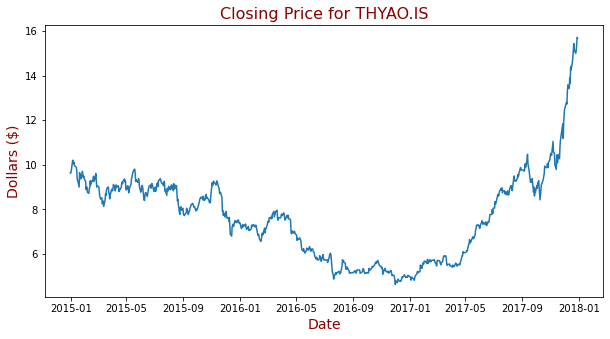

In [8]:
plt.figure(figsize=(10,5))
plt.plot(thy.Close)
plt.title('Closing Price for THYAO.IS',fontsize=16, color="darkred")
plt.xlabel('Date',fontsize=14, color="darkred")
plt.ylabel('Dollars ($)',fontsize=14, color="darkred")
plt.show()

In [9]:
closing_price=thy.Close
thy_return=closing_price.pct_change().dropna()

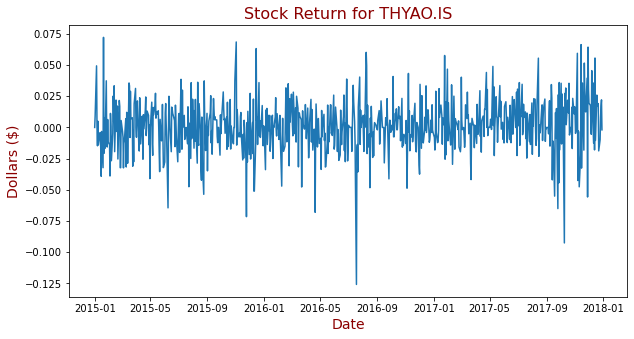

In [10]:
plt.figure(figsize=(10,5))
plt.plot(thy_return)
plt.title('Stock Return for THYAO.IS',fontsize=16, color="darkred")
plt.xlabel('Date',fontsize=14, color="darkred")
plt.ylabel('Dollars ($)',fontsize=14, color="darkred")
plt.show()